In [1]:
!pip install tensorflow
!pip install opencv-python-headless


In [2]:
pip install --upgrade tensorflow keras

   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.3 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.3 MB ? eta -:--:--
   --------------- ------------------------ 0.5/1.3 MB 558.9 kB/s eta 0:00:02
   --------------- ------------------------ 0.5/1.3 MB 558.9 kB/s eta 0:00:02
   ----------------------- ---------------- 0.8/1.3 MB 578.7 kB/s eta 0:00:01
   ------------------------------- -------- 1.0/1.3 MB 740.5 kB/s eta 0:00:01
   ---------------------------------------- 1.3/1.3 MB 852.9 kB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.9.1
    Uninstalling keras-3.9.1:
      Successfully uninstalled keras-3.9.1
Note: you may need to restart the kernel to use updated packages.


In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
import numpy as np
import random
import math
import csv
import cv2
import os

In [6]:
inputBasePath    = r"C:\Users\sevcan\OneDrive\Desktop\yapay_zekaödev\mlrepo\cnn intro\images"
outputBasePath =  r"C:\Users\sevcan\OneDrive\Desktop\yapay_zekaödev\mlrepo\cnn intro\imagearrays"

In [9]:
image_width = 224
image_height = 224

In [11]:
classes = ['cat','dog']

In [13]:
os.chdir(inputBasePath)

X = []
Y = []

i = 0
for class1 in classes:
  os.chdir(class1)
  print('=> '+class1)
  for files in os.listdir('./'):
    img = cv2.imread(files)
    img = cv2.resize(img, (image_width, image_height))
    X.append(img)
    Y.append(class1)
    i = i + 1
  os.chdir('..')
  
print("X : ", len(X))
print("Y : ", len(Y))

X = np.array(X).reshape(-1, image_width, image_height, 3)
Y = np.array(Y)

print("X : ", X.shape)
print("Y : ", Y.shape)

print("X : ", len(X))
print("Y : ", len(Y))

os.chdir('..')
os.chdir("imagearrays")

np.save(str(image_width)+'x'+str(image_height)+'_images', X)
np.save(str(image_width)+'x'+str(image_height)+'_labels', Y)

print("[ INFO - STAGE1 ]  NUMPY ARRAY CREATION COMPLETED \n ")


=> cat
=> dog
X :  244
Y :  244
X :  (244, 224, 224, 3)
Y :  (244,)
X :  244
Y :  244
[ INFO - STAGE1 ]  NUMPY ARRAY CREATION COMPLETED 
 


In [15]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import MaxPool2D 
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD

In [17]:
data = np.load(r"C:\Users\sevcan\OneDrive\Desktop\yapay_zekaödev\mlrepo\cnn intro\imagearrays\224x224_images.npy")
labels = np.load(r"C:\Users\sevcan\OneDrive\Desktop\yapay_zekaödev\mlrepo\cnn intro\imagearrays\224x224_labels.npy")
data.shape

(244, 224, 224, 3)

In [19]:
labels

array(['cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat',
       'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat',
       'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat',
       'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat',
       'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat',
       'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat',
       'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat',
       'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat',
       'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat',
       'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat',
       'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat',
       'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat',
       'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat',
       'cat', 'cat', 'cat', 'cat', 'dog', 'dog', 'dog', 'dog', 'dog',
       'dog', 'dog',

In [21]:
labels = labels.flatten()

labelEn = LabelEncoder()
labels = labelEn.fit_transform(labels)

labels = to_categorical(labels)


In [23]:
labels

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.

In [25]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size = .20, shuffle = True)


print(
"""
x_train shape: {}
x_test shape: {}
y_train shape: {}
y_test shape: {}

""".format(x_train.shape, x_test.shape, y_train.shape, y_test.shape))


x_train shape: (195, 224, 224, 3)
x_test shape: (49, 224, 224, 3)
y_train shape: (195, 2)
y_test shape: (49, 2)




In [27]:
x_train_mean = np.mean(x_train)
x_train_std = np.std(x_train)

x_test_mean = np.mean(x_test)
x_test_std = np.std(x_test)

x_train = (x_train - x_train_mean)/x_train_std
x_test = (x_test - x_test_mean)/x_test_std

In [28]:
x_train, x_validate, y_train, y_validate = train_test_split(x_train, y_train, test_size = .10, shuffle = True,random_state=42)

In [31]:
def model1(input_shape=(image_width ,image_height ,3), num_classes = 2):
    model = Sequential()
    chanDim = -1

    model.add(Conv2D(64, (3,3), padding="same", input_shape=input_shape))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(Conv2D(64, (3,3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(128, (3,3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(Conv2D(128, (3,3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(256, (3,3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(Conv2D(256, (3,3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(Conv2D(256, (3,3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(512, (3,3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(Conv2D(512, (3,3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(Conv2D(512, (3,3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(512, (3,3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(Conv2D(512, (3,3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(Conv2D(512, (3,3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(4096))
    model.add(Activation("relu"))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    model.add(Dense(4096))
    model.add(Activation("relu"))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    model.add(Dense(num_classes))
    model.add(Activation("softmax"))

    return model


In [33]:
def model2(input_shape=(image_width ,image_height ,3), num_classes = 2):
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',padding = 'Same',input_shape=input_shape))
    model.add(Conv2D(64,kernel_size=(3, 3), activation='relu',padding = 'Same',))
    model.add(MaxPool2D(pool_size = (2, 2)))
    model.add(Dropout(0.5))

    model.add(Conv2D(128, (3, 3), activation='relu',padding = 'Same'))
    model.add(Conv2D(64, (3, 3), activation='relu',padding = 'Same'))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Dropout(0.5))

    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax')) 
    return model

In [35]:
model = model2()
model.summary()

C:\Users\sevcan\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 224, 224, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 112, 112, 64)   │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 200704)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    25,690,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,022,914 (99.27 MB)

 Trainable params: 26,022,914 (99.27 MB)

 Non-trainable params: 0 (0.00 B)

In [37]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


In [39]:
tf.keras.utils.plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


In [41]:
optimizer = Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999,  epsilon=1e-7, amsgrad=False) 
#burada videoda hoca none kullanıyordu fakat bu sürümünde uygulayınca hata verdi o yüzden epsilon e değeri atadım



In [43]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience=3, verbose=1,  factor=0.5, min_lr=0.00001)

In [45]:
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [47]:
epc = 5 
bs = 5

In [49]:
history = model.fit(x_train,y_train, batch_size=bs,
                              epochs = epc, validation_data = (x_validate,y_validate),
                              verbose = 1, callbacks=[learning_rate_reduction])

Epoch 1/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.4534 - loss: 0.8401 - val_accuracy: 0.4500 - val_loss: 0.6934 - learning_rate: 1.0000e-04
Epoch 2/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 48s 1s/step - accuracy: 0.5126 - loss: 0.6981 - val_accuracy: 0.7000 - val_loss: 0.6887 - learning_rate: 1.0000e-04
Epoch 3/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 48s 1s/step - accuracy: 0.5900 - loss: 0.6826 - val_accuracy: 0.7000 - val_loss: 0.6709 - learning_rate: 1.0000e-04
Epoch 4/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.6043 - loss: 0.6575 - val_accuracy: 0.6500 - val_loss: 0.6677 - learning_rate: 1.0000e-04
Epoch 5/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6259 - loss: 0.6270
Epoch 5: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.
35/35 ━━━━━━━━━━━━━━━━━━━━ 47s 1s/step - accuracy: 0.6269 - loss: 0.6272 - val_accuracy: 0.7000 - val_loss: 0.6300 - learning_rate: 1.0000e-04


In [51]:
history.history.keys()


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss', 'learning_rate'])

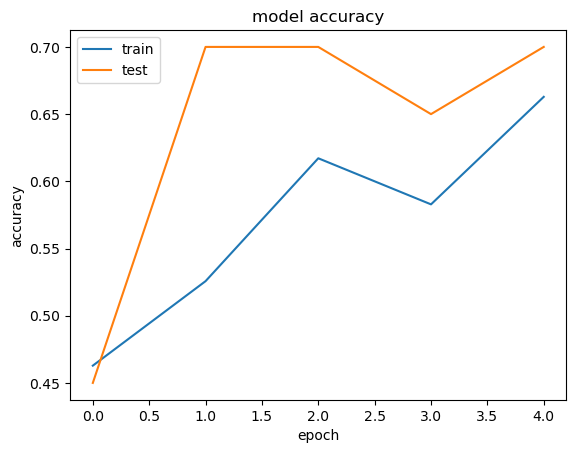

In [55]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

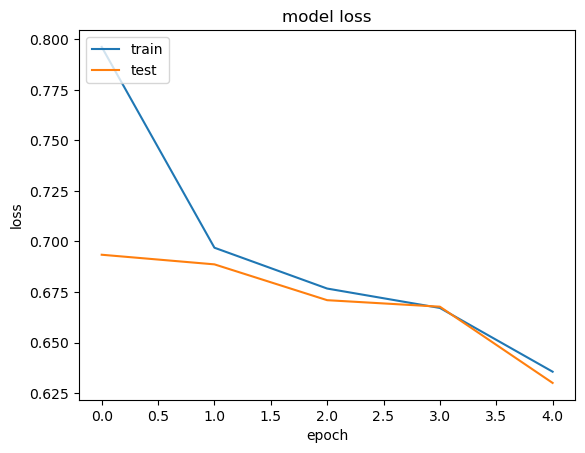

In [57]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [59]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step   


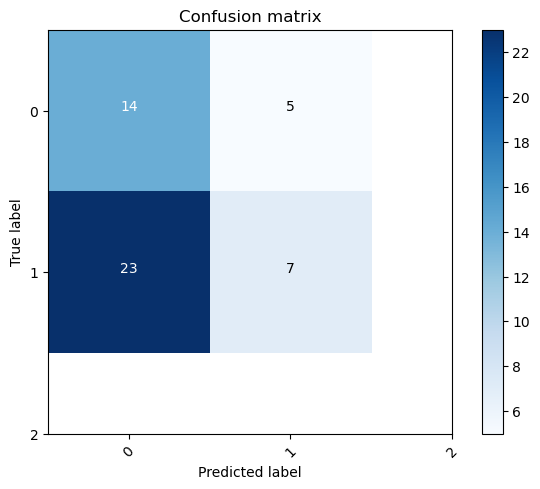

In [61]:
Y_pred = model.predict(x_test)   
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1)  #test süreci için Y_true = np.argmax(y_test,axis = 1)
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(3))

In [63]:
from sklearn.metrics import classification_report
report = classification_report(Y_true, Y_pred_classes)
print(report)

              precision    recall  f1-score   support

           0       0.38      0.74      0.50        19
           1       0.58      0.23      0.33        30

    accuracy                           0.43        49
   macro avg       0.48      0.49      0.42        49
weighted avg       0.50      0.43      0.40        49



In [67]:
  os.chdir(r"C:\Users\sevcan\OneDrive\Desktop\model") #modeli kaydetmek için 
  model.save('my_model.keras')

In [68]:

preds = model.predict(x_test)
y_pred = np.zeros_like(preds)
y_pred[np.arange(len(preds)), preds.argmax(1)] = 1
classes = ['cat','dog']
confusionMatrix = np.zeros((len(classes),len(classes)))

for i in range(len(y_test)):

  if np.array_equal(y_pred[i],y_test[i]):
    index = np.argmax(y_test[i])
    confusionMatrix[index,index] += 1

  else:

    index1 = np.argmax(y_test[i])
    index2 = np.argmax(y_pred[i])
    confusionMatrix[index1,index2] += 1

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 797ms/step


CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.38      0.74      0.50        19
           1       0.58      0.23      0.33        30

   micro avg       0.43      0.43      0.43        49
   macro avg       0.48      0.49      0.42        49
weighted avg       0.50      0.43      0.40        49
 samples avg       0.43      0.43      0.43        49

Accuracy Score : 
0.42857142857142855
--------------------------------------------------
Confusion Matrix : 
[[14.  5.]
 [23.  7.]]
--------------------------------------------------


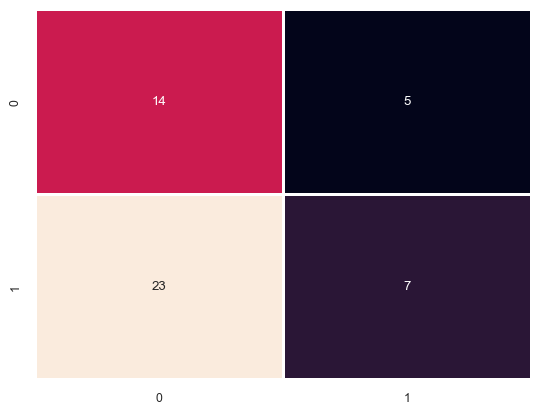

In [71]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
print("CLASSIFICATION REPORT")
print(classification_report(y_test, y_pred))
print("Accuracy Score : ")
print(accuracy_score(y_test, y_pred))
cm = accuracy_score(y_test, y_pred)
sns.set(font_scale=0.8)
sns.heatmap(confusionMatrix,annot=True, linewidths=1.0, cbar=False)
print("--------------------------------------------------")
print("Confusion Matrix : ")
print(confusionMatrix)
print("--------------------------------------------------")

In [75]:
#ImageDataGenerator ile veri arttırım modelini kurgula ve datagen değikenine ata
datagen = ImageDataGenerator(  
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180) 10 degrees
        zoom_range = 0.1, # Randomly zoom image %10
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width) %10
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height) %10
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False  # randomly flip images
                        )
datagen.fit(x_train) #datagen'i x_train üzerinden çalıştır ve veri üret

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.7873093..2.0468595].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.6640058..1.1672632].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.7633382..1.8957727].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.4386613..2.0959945].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.6870108..2.0959945].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.7777876..2.0591104].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.787309

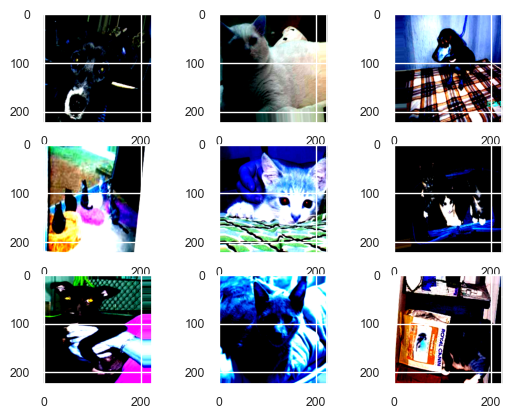

In [79]:
from matplotlib import pyplot
for X_batch, y_batch in datagen.flow(x_train, y_train, batch_size=9):
	# create a grid of 3x3 images
	for i in range(0, 9):
		pyplot.subplot(330 + 1 + i)
		pyplot.imshow(X_batch[i].reshape(224, 224,3))
	# show the plot
	pyplot.show()
	break

In [81]:
history = model.fit(datagen.flow(np.array(x_train),np.array(y_train), batch_size=bs), 
                              epochs = epc, validation_data = datagen.flow(np.array(x_validate),
                             np.array(y_validate),batch_size=bs),verbose = 1, 
                              steps_per_epoch=x_train.shape[0] // bs, 
                              callbacks=[learning_rate_reduction])

C:\Users\sevcan\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 50s 1s/step - accuracy: 0.7143 - loss: 0.6010 - val_accuracy: 0.7000 - val_loss: 0.6146 - learning_rate: 5.0000e-05
Epoch 2/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 48s 1s/step - accuracy: 0.6750 - loss: 0.6401 - val_accuracy: 0.6000 - val_loss: 0.6481 - learning_rate: 5.0000e-05
Epoch 3/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 49s 1s/step - accuracy: 0.7533 - loss: 0.5946 - val_accuracy: 0.6000 - val_loss: 0.6579 - learning_rate: 5.0000e-05
Epoch 4/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6460 - loss: 0.6262
Epoch 4: ReduceLROnPlateau reducing learning rate to 2.499999936844688e-05.
35/35 ━━━━━━━━━━━━━━━━━━━━ 48s 1s/step - accuracy: 0.6471 - loss: 0.6254 - val_accuracy: 0.7000 - val_loss: 0.6017 - learning_rate: 5.0000e-05
Epoch 5/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 49s 1s/step - accuracy: 0.7358 - loss: 0.5608 - val_accuracy: 0.7000 - val_loss: 0.6664 - learning_rate: 2.5000e-05


In [83]:
from keras.applications.vgg16 import VGG16, preprocess_input
base_model = VGG16(
    weights="imagenet",
    include_top=False, 
    input_shape=(image_width ,image_height ,3)
   
)

In [84]:
NUM_CLASSES=2
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(NUM_CLASSES, activation='softmax'))

model.layers[0].trainable = False

In [85]:

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 2)              │        50,178 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,764,866 (56.32 MB)

 Trainable params: 50,178 (196.01 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [86]:
import tensorflow as tf
tf.config.run_functions_eagerly(True)


In [87]:
optimizer = Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-7, amsgrad=False)


In [88]:
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [89]:
history = model.fit(x_train,y_train, batch_size=bs,
                              epochs = epc, validation_data = (x_validate,y_validate),
                              verbose = 1, callbacks=[learning_rate_reduction])

C:\Users\sevcan\anaconda3\Lib\site-packages\tensorflow\python\data\ops\structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 195s 6s/step - accuracy: 0.5446 - loss: 1.0151 - val_accuracy: 0.8000 - val_loss: 0.3859 - learning_rate: 1.0000e-04
Epoch 2/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 200s 6s/step - accuracy: 0.7920 - loss: 0.3893 - val_accuracy: 0.9000 - val_loss: 0.2681 - learning_rate: 1.0000e-04
Epoch 3/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 201s 6s/step - accuracy: 0.9590 - loss: 0.1920 - val_accuracy: 0.9500 - val_loss: 0.1973 - learning_rate: 1.0000e-04
Epoch 4/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 197s 6s/step - accuracy: 0.9401 - loss: 0.1766 - val_accuracy: 0.9500 - val_loss: 0.2030 - learning_rate: 1.0000e-04
Epoch 5/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 196s 6s/step - accuracy: 0.9848 - loss: 0.1031 - val_accuracy: 0.9500 - val_loss: 0.1914 - learning_rate: 1.0000e-04


In [90]:
history = model.fit(datagen.flow(np.array(x_train),np.array(y_train), batch_size=bs), 
                              epochs = epc, validation_data = datagen.flow(np.array(x_validate),
                             np.array(y_validate),batch_size=bs),verbose = 1, 
                              steps_per_epoch=x_train.shape[0] // bs, 
                              callbacks=[learning_rate_reduction])

Epoch 1/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 197s 6s/step - accuracy: 0.9299 - loss: 0.1902 - val_accuracy: 0.9500 - val_loss: 0.1995 - learning_rate: 1.0000e-04
Epoch 2/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 197s 6s/step - accuracy: 0.9184 - loss: 0.2092 - val_accuracy: 0.8500 - val_loss: 0.2688 - learning_rate: 1.0000e-04
Epoch 3/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 197s 6s/step - accuracy: 0.9729 - loss: 0.1233 - val_accuracy: 0.8500 - val_loss: 0.2283 - learning_rate: 1.0000e-04
Epoch 4/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.9280 - loss: 0.1763
Epoch 4: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.
35/35 ━━━━━━━━━━━━━━━━━━━━ 197s 6s/step - accuracy: 0.9287 - loss: 0.1753 - val_accuracy: 0.9500 - val_loss: 0.2218 - learning_rate: 1.0000e-04
Epoch 5/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 196s 6s/step - accuracy: 0.9555 - loss: 0.1290 - val_accuracy: 0.9000 - val_loss: 0.2528 - learning_rate: 5.0000e-05
